<a href="https://colab.research.google.com/github/JaradAng/tensorflow_training/blob/main/CNN_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.

In [42]:

import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()
     
     

--2022-12-06 20:13:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.69.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  32.8MB/s    in 3.2s    

2022-12-06 20:14:00 (32.8 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



#inspecting the data to get to know it
a very crucial step at begining of any ml project is to know your data. and for computer vision this means looking at many samples

In [43]:
!ls pizza_steak

test  train


In [44]:
!ls pizza_steak/train

pizza  steak


In [45]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [46]:
import os

#walkthru the pizaa steak directory and list num of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [47]:
num_steak_train = len(os.listdir('pizza_steak/train/steak'))

In [48]:
num_steak_train

750

to vizualize images lets get class names programatically

In [49]:
# get the class names programatically
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #create list of class names 
print(class_names)

['pizza' 'steak']


In [50]:
#viz the images
import matplotlib.image as mpimg
import random

def view_rand_image(target_dir, target_class):
  #set target directory and view from there
  target_folder = target_dir + target_class

  #get ran image 
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'image shape: {img.shape}')

  return img



image shape: (512, 512, 3)


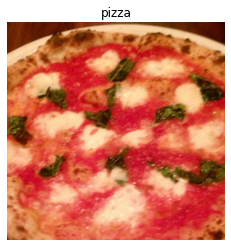

In [51]:
#view random image
img = view_rand_image(target_dir='pizza_steak/train/',
                      target_class='pizza')

In [52]:
##view shape 
img.shape #returns W, h, and color

(512, 512, 3)

## building an end to end cnn 

* load images
* preprocess
* build cnn to find patterns
* compile cnn 
* fit cnn
* evaluate cnn

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#setting seed
tf.random.set_seed(42)

#Preprocess the data to between 0-1 scaling/normalization
train_datagen = ImageDataGenerator(rescale = 1./255) # 255 is max pixels

valid_datagen = ImageDataGenerator(rescale = 1./255)

#Set up path to data directory
train_dir = "/content/pizza_steak/train"

test_dir = 'pizza_steak/test'

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

#Build a cnn model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation= 'relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 239ms/step - loss: 0.5847 - accuracy: 0.6887 - val_loss: 0.5029 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4382 - accuracy: 0.7980 - val_loss: 0.3353 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3817 - accuracy: 0.8407 - val_loss: 0.3137 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3879 - accuracy: 0.8233 - val_loss: 0.3409 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3292 - accuracy: 0.8667 - val_loss: 0.2990 - val_accuracy: 0.8800


In [54]:
#using a noncnn model to see how it works on image

#set seed. 
tf.random.set_seed(42)

#build model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data, epochs =5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 1.0284 - accuracy: 0.6133 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [55]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 4)                 602116    
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [56]:
#Trying to improve noncnn model

#Set see
tf.random.set_seed(42)

#Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

#compile
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 4.6966 - accuracy: 0.6593 - val_loss: 1.7981 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 1.0580 - accuracy: 0.6640 - val_loss: 1.1388 - val_accuracy: 0.6560
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 1.0268 - accuracy: 0.7153 - val_loss: 0.4567 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4724 - accuracy: 0.8000 - val_loss: 0.4256 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4718 - accuracy: 0.8000 - val_loss: 0.9476 - val_accuracy: 0.5780


In [57]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


There are less trainable parameters in CNN but they are more efficient than nonCNN. Usually better than dense networks to still get a restult but not as good. 

## Breaking down binary classification
1. Vizulise the data
2. preprocess the data, scaling/normalizing
3. created a model start with baseline
4. fit the model
5. eval the model
6. adjust parameters and try to improve the model
7. repeat until satisfied

image shape: (512, 384, 3)
image shape: (512, 512, 3)


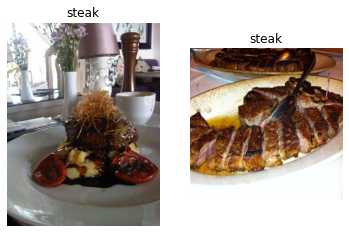

In [58]:
#viz the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_rand_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img= view_rand_image('pizza_steak/train/', 'steak')

In [59]:
#Preprocess the data
#Define directory dataset paths

train_dir = 'pizza_steak/train/'

test_dir = 'pizza_steak/test/'

#Our next step is to turn data into batches

a batch is a small subset of data, instead of looking at all 1500 images at one time it will only look a batch

It does this because:
1. all the images might not fit into the GPU
2. trying to learn patterns in all the images could result in model not being able to learn very well. 

Why is default batch 32?
because it is good for your health... yann le cunn 

In [60]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.) # will rescale our imaages

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [61]:
#load in image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224), #target size of images ( hieght and width)
                                               class_mode='binary', #type of categorical, binary, or sparse
                                               batch_size= 32) #Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size= (224,224),
                                             class_mode='binary',
                                             batch_size= 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [62]:
#get a sample of a train data batch
images, labels = train_data.next() #get the next batch of images and labels

In [63]:
len(images), len(labels)

(32, 32)

In [64]:
#how many batches are there
len(train_data) # matches the 1500 / 32 for our batch size

47

In [65]:
#lets look at first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [66]:
#View the labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model starting with a baseline

A baseline is simple model or existing result when beginining machine learning experiment and as you keep experimenting you try to beat baseline

Its important to make baseline and introduce complexity as you go forward

In [67]:
#creating model a bit easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [68]:
#create baseline 3 layer CNN
model_4 = Sequential([
    Conv2D(filters=10, #filters is the number of sliding windows going across an input
           kernel_size=3, # size of sliding window going across an input
           strides=1, #size of the step the sliding window takes across an input
           padding='valid', #if same, the output shape is the same as input shape, if valid the output shape gets compressed 
           activation='relu',
           input_shape=(224, 224, 3)), #input layer since specify the input shape
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') #output layer with binary classification to only 1 output neuron
])




In [69]:
#compile
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [70]:
#fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.7505 - accuracy: 0.6787 - val_loss: 0.5382 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4532 - accuracy: 0.7980 - val_loss: 0.4200 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3365 - accuracy: 0.8640 - val_loss: 0.4303 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2093 - accuracy: 0.9247 - val_loss: 0.4140 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.0923 - accuracy: 0.9800 - val_loss: 0.4216 - val_accuracy: 0.8180


### Evaluating the model 

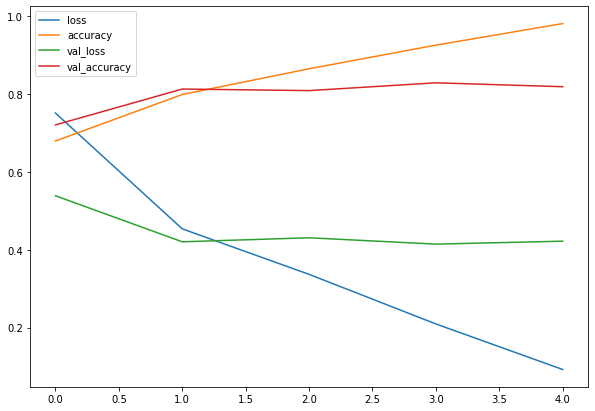

In [71]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [72]:
#plot validation and training seperately 
def plot_loss_curve(history):
  """
  returns seperate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot the loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend();

  #plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('training')
  plt.xlabel('epochs')
  plt.legend();

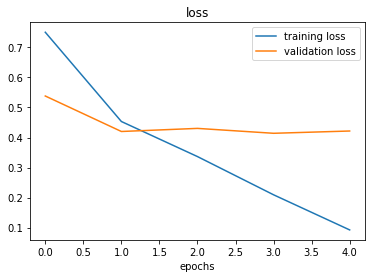

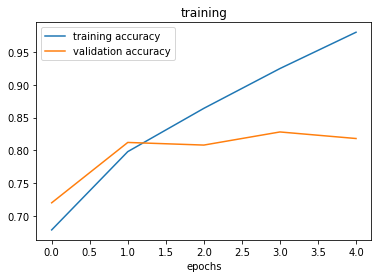

In [73]:
#check out loss and accuracy of model 4
plot_loss_curve(history_4)

when a model validation loss starts to increase, its likely that the model is ** over fitting ** the training data set. this means its learning patterns in training data too well and models ability to generalize to unseen data is diminished

###6. Adjusting model parameters

0. create a baseline
1. beat baseline by overtting a larger model
2. reduce overfitting

Ways to induce overfitting
1. increase number of conv layers
2. increase number of conv filters
3. add naother dense layer to the output of our flattened layer.

Ways to reduce overfitting
1. add data augmentation
2. add regularization layers ie. maxpool
3. add more data

In [74]:
#create model with less overfitting adding in maxpool
model_5 = Sequential([
    Conv2D(10, 3, 
           activation = 'relu',
           input_shape=(224, 224, 3),),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [75]:
#compile the model
model_5.compile(loss= 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [76]:
#fit
history_5 = model_5.fit(train_data,
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.5826 - accuracy: 0.6973 - val_loss: 0.4699 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4704 - accuracy: 0.7847 - val_loss: 0.4914 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4326 - accuracy: 0.8180 - val_loss: 0.3640 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3945 - accuracy: 0.8260 - val_loss: 0.3444 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4019 - accuracy: 0.8240 - val_loss: 0.3422 - val_accuracy: 0.8620


In [77]:
#Check the summary with max pool
model_5.summary(), model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 10)      

(None, None)

Model 5 out perfoms modle 4 with substainally less training params

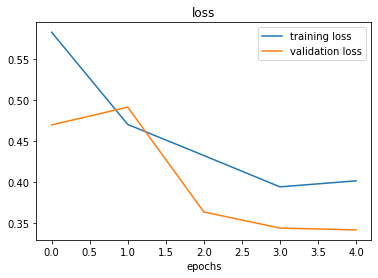

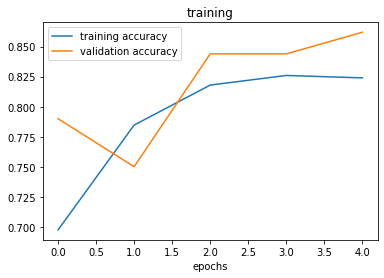

In [78]:
plot_loss_curve(history_5)

### Bringing data augmentation

- Data augmentation is the process of altering our training data leading it to have more diversity to have more diversity. this allows models to be more generalizable patterns and altering might mean adjusting the rotation of an image, cropping etc. 

In [83]:
# Create imagedatagenerator with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/ 255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range =0.3,
                                             horizontal_flip=True)

#Create imagedatagen without augmentatino
train_dategen = ImageDataGenerator(rescale = 1/255.)

#Create imgdatgen without aug for test
test_datagen = ImageDataGenerator(rescale = 1/255.)

#import data and augment it
train_data_augmented = train_datagen_augmented.flow_from_directory('/content/pizza_steak/train',
                                                                   target_size = (224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)


#non aug data
train_data = train_datagen.flow_from_directory('/content/pizza_steak/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
#non aug test data
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224,224),
                                             batch_size =32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Data augmentation is only performed on the training data. using imagedatagenerator built in data augmented but only for use in model not the directory

In [85]:
#Gettin some samples
images, labels = train_data.next()

aug_images, aug_labels = train_data_augmented.next()

Text(0.5, 1.0, 'aug img')

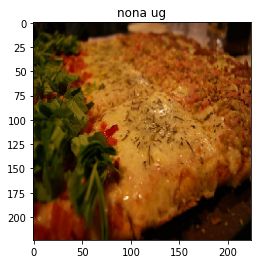

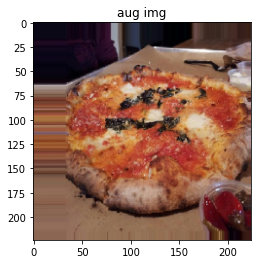

In [88]:
random_number = random.randint(0,31) # to meet batch size
plt.imshow(images[random_number])
plt.title('nona ug')

plt.figure()
plt.imshow(aug_images[random_number])
plt.title('aug img')

In [94]:
#build model with aug data model. 

model_6 = Sequential([
    Conv2D(10, 3,
           activation='relu',
           input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#compile
model_6.compile(loss = 'binary_crossentropy',
                optimizer= Adam(),
                metrics=['accuracy'])

#Fit
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 462ms/step - loss: 0.7087 - accuracy: 0.4693 - val_loss: 0.6870 - val_accuracy: 0.5520
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6867 - accuracy: 0.5073 - val_loss: 0.6748 - val_accuracy: 0.5260
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6987 - accuracy: 0.5067 - val_loss: 0.6820 - val_accuracy: 0.6180
Epoch 4/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6811 - accuracy: 0.5547 - val_loss: 0.6403 - val_accuracy: 0.6560
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6583 - accuracy: 0.6240 - val_loss: 0.5598 - val_accuracy: 0.7340


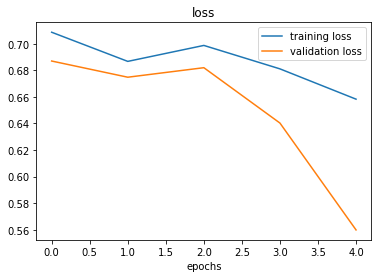

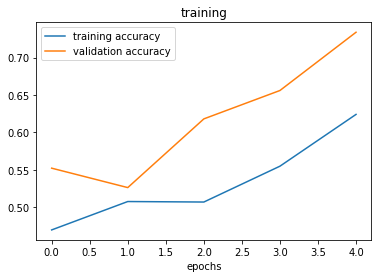

In [95]:
#check the models learning curves
plot_loss_curve(history_6)